# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification?select=test

**Task:**

The task of this dataset is to classify the images into the class 'Chihuahua' and 'muffin'. 
The dataset has 5917 files which are divided into 4 directories.
1. test/chihuahua: 640 files. 
2. test/muffin: 544 files.
3. train/chihuahua: 2559 files. 
4. train/muffin: 2174 files.

**Datasets**

* Train dataset: I used the 'train' directory to train the model. 3733 images.

* Validation dataset: I chose 1000 files randomly from 'test' directory.

* Test dataset: I chose 1184 files randomly from 'test' directory.

**Models used in Midterm project and its performance**
1. SVC: 69%
2. CNN: 91% (val_accuracy 기준)

**Some strategies to improve model performance**
1. Data preprocessing
    1. Standard Scaler: 데이터를 평균이 0이고 분산이 1인 데이터로 변환
    2. Minmax Scaler: 데이터를 [0.1]사이의 데이터로 변환
    3. Data Augmentation: 데이터 증폭
2. Optimizers
    1. Momentum
    2. AdaGrad
    3. RMSProp
    4. Adam
3. Advanced Techniques
    1. Weight Initialization
    2. Bias Initialization
    3. Weight Reularization
    4. Batch Normalization
    5. Dropout
    6. Transfer learning

**Models used in this project**
1. CNN 
- The aim of this project is to improve the performance. It is well known that CNN has better performance than MLP in image processing.
- In the midterm project, the developer tried to improve the performance with changing optimizer. dropout and batchnormalization.
- Then, I tried to weight initialization to reach the aim.

2. Transfer learning(Freezing-Feature extractor)
- The train dataset I used is not that big so I tried freezing not fine-tuning.
- The pretrained model I chose is VGG, Alexnet, and Resnet.
- Every models will be trained and tested with optimizers: ADAM.
    - Tried to used various optimizers but due to the specification issue, I had to chose one.
    - ADAM is a method that combined Adagrad + Momentum
    - The developer of midterm project revealed that ADAM is better than SGD in this dataset.

**Features(x):**

As they are images, the input features can be differ from models.
First of all, as the task is to classify chihuahua and muffin, I used classification models: CNN, VGG, Alexnet, and Resnet.
1. CNN: The spacial information is reflected in features. It will not converted in linear form in the convolutional layer.
2. VGG, Alexnet, Resnet: features will be extracted from pretrained model.
...

**Target(y):**

Target is to find out in which class the input image is.
1. Chihuahua
2. Muffin

...

---

## Build Your Model

### Data preprocessing

In [13]:
#kaggle 설치
!pip install kaggle
#kaggle에서 데이터셋 다운로드. kaggle.json 관련 오류가 난다면, https://freshrimpsushi.github.io/posts/how-to-fix-oserror-could-not-find-kaggle.json/ 참고
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification



  0%|          | 0.00/474M [00:00<?, ?B/s]
  0%|          | 1.00M/474M [00:00<05:12, 1.59MB/s]
  0%|          | 2.00M/474M [00:00<02:39, 3.11MB/s]
  1%|          | 3.00M/474M [00:00<02:01, 4.06MB/s]
  1%|          | 4.00M/474M [00:01<01:35, 5.15MB/s]
  1%|1         | 5.00M/474M [00:01<01:25, 5.77MB/s]
  1%|1         | 6.00M/474M [00:01<01:19, 6.19MB/s]
  1%|1         | 7.00M/474M [00:01<01:14, 6.54MB/s]
  2%|1         | 8.00M/474M [00:01<01:12, 6.77MB/s]
  2%|1         | 9.00M/474M [00:01<01:12, 6.71MB/s]
  2%|2         | 10.0M/474M [00:01<01:11, 6.77MB/s]
  2%|2         | 11.0M/474M [00:02<01:09, 6.96MB/s]
  3%|2         | 12.0M/474M [00:02<01:08, 7.08MB/s]
  3%|2         | 13.0M/474M [00:02<01:07, 7.18MB/s]
  3%|2         | 14.0M/474M [00:02<01:06, 7.26MB/s]
  3%|3         | 15.0M/474M [00:02<01:05, 7.31MB/s]
  3%|3         | 16.0M/474M [00:02<01:05, 7.35MB/s]
  4%|3         | 17.0M/474M [00:02<01:04, 7.37MB/s]
  4%|3         | 18.0M/474M [00:03<01:04, 7.39MB/s]
  4%|4         | 19.

In [14]:
#다운로드 한 이미지 압축파일 압축 해제
import os
import zipfile

local_zip = 'muffin-vs-chihuahua-image-classification.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./tmp')
zip_ref.close()


In [15]:
!pip install torch

In [16]:
!pip install scikit-learn

In [42]:
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch.nn.init as init

from PIL import Image
import numpy as np

In [26]:
lr = 0.001 # 학습률
batch_size = 100 # 한번에 얼만큼의 이미지를 학습시킬지
epochs = 10 # 데이터를 몇 번 반복하여 학습시킬지

In [27]:
# 주어진 이미지 데이터를 일괄적으로 300 * 300 의 크기로 변환하고, 텐서로 변환할 수 있는 부분
trans = transforms.Compose([transforms.Resize((300, 300)),
                           transforms.ToTensor()
                           ])

# 각 이미지 폴더에 위치한 이미지들을 텐서로 가져옴
train_dataset = torchvision.datasets.ImageFolder(root= './tmp/train',
                                                     transform = trans)

test_data = torchvision.datasets.ImageFolder(root= './tmp/test',
                                                     transform = trans)

# train 데이터 폴더의 사진을
#train / validation 데이터의 랜덤한 두 가지 값으로 나뉘도록 함.
val_size = 1000
train_size = len(train_dataset) - val_size
train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

# 각 학습용 데이터들을 사전 정의한 batch_size 단위로 처리할 수 있도록 데이터 로드를 생성합니다.
train_loader = DataLoader(dataset=train_data, #어디서
                          batch_size=batch_size, #얼마나 뽑을지
                          shuffle=True) #랜덤으로 추출
val_loader = DataLoader(dataset=val_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=False)

print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))

Length of Train Data : 3733
Length of Validation Data : 1000
3733 38
1000 10


## Model construction

In [43]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()

        # 첫번째 레이어 정의
        self.layer1 = nn.Sequential(
            # 이미지를 입력값으로 받으므로, 최초 입력 채널의 크기는 3
            #(채널갯수, 출력채널(임의 설정), 필터사이즈(임의 설정)) 출력채널은 output의 depth.
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            # BatchNorm2d를 이용하여 학습 시 사용되는 batch를 정규화
            nn.BatchNorm2d(16),
            # 활성화 함수
            nn.ReLU(),
            # 2x2 Max 풀링
            nn.MaxPool2d(2)
        )

        # 두번째 레이어 정의
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        # 세번째 레이어 정의
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Weight Initialization
        for m in self.modules() :
            if isinstance(m, nn.Conv2d):
                # init.xavier_normal(m.weight.data)
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)      
            if isinstance(m, nn.Linear):
                # init.xavier_normal(m.weight.data)
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)  
        
        # MLP 레이어 정의
        # 출력된 최종 레이어를 하나로 쭉 늘어뜨린 뒤, 10개의 출력층에 맵핑
        #nn.Linear(마지막 출력 채널*(conv_layer 이후 출력크기)) -> conv이후 출력은 (N+2P-F)/S+1
        self.fc1 = nn.Linear(1024,10)
        # Dropout 레이어는 학습 중 일부 뉴런을 무작위로 비활성화하여 과적합을 방지
        self.dropout = nn.Dropout(0.5)
        # 위에서 10개로 줄어든 출력층을 최종 muffin/chihuahua 2개의 출력층으로 분류
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()

    # 상단에서 정의해준 각각의 레이어를 실행시키는 순방향전파 기능을 정의합니다.
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [44]:
# 모델 생성 : 상단에서 정의한 모델 활용
model = Cnn()
# 모델 학습 모드 설정
model.train()
# 최적화 함수 설정 : Adam(Adaptive Moment Estimation)
# Adam? : Pytorch에 구현되어있는 경사하강법의 변형 중 하나
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
# 손실 함수는 CrossEntropy함수를 사용합니다.
criterion = nn.CrossEntropyLoss()

## Training and Validation

In [45]:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    # 학습 데이터 로더 train_loader에서 batch 데이터를 가져옵니다.
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        output = model(batch_images)
        loss = criterion(output, batch_labels)

        optimizer.zero_grad()   # 최적화 함수 가중치 초기화
        loss.backward()         # 역전파 수행하여 가중치 계산하고, 모델의 파라미터를 업데이트
        optimizer.step()        # 최적화 함수의 파라미터도 업데이트

        acc = ((output.argmax(dim=1) == batch_labels).float().mean())   # 예측값의 정확도를 계산합니다.
        epoch_accuracy += acc/len(train_loader)                         # 지금 수행중인 학습의 정확도와 손실을 누적합니다.
        epoch_loss += loss/len(train_loader)

    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


    with torch.no_grad():       # validation data로 학습에 대한 검증을 수행합니다.
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            val_output = model(data)
            val_loss = criterion(val_output,label)


            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)

        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.7936285138130188, train loss : 0.4579622447490692
Epoch : 1, val_accuracy : 0.8379999995231628, val_loss : 0.36864298582077026
Epoch : 2, train accuracy : 0.8760446310043335, train loss : 0.31177812814712524
Epoch : 2, val_accuracy : 0.8790000081062317, val_loss : 0.2953033745288849
Epoch : 3, train accuracy : 0.9012598395347595, train loss : 0.25062495470046997
Epoch : 3, val_accuracy : 0.8859999775886536, val_loss : 0.2975468337535858
Epoch : 4, train accuracy : 0.9157893061637878, train loss : 0.2165369689464569
Epoch : 4, val_accuracy : 0.8890000581741333, val_loss : 0.278389573097229
Epoch : 5, train accuracy : 0.9368258714675903, train loss : 0.17663362622261047
Epoch : 5, val_accuracy : 0.8970000147819519, val_loss : 0.25509345531463623
Epoch : 6, train accuracy : 0.9518421292304993, train loss : 0.14300206303596497
Epoch : 6, val_accuracy : 0.9029999375343323, val_loss : 0.26532065868377686
Epoch : 7, train accuracy : 0.961578905582428, train loss 

## Performance

Accuracy of test images: 90.878378 %


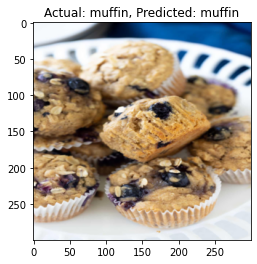

In [47]:
correct_CNN = 0
total_CNN = 0

for images, labels in test_loader:
    images = images
    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)

    total_CNN += labels.size(0)
    correct_CNN += (predicted == labels).sum()

print('Accuracy of test images: %f %%' % (100 * float(correct_CNN) / total_CNN))

import random
import matplotlib.pyplot as plt

# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋에서 무작위 이미지 선택
random_image_idx = random.randint(0, len(test_data) - 1)
image, label = test_data[random_image_idx]

# 순방향전파를 실행하여 예측 획득
with torch.no_grad():
    image = image.unsqueeze(0)
    prediction = model(image)

predicted_class = prediction.argmax().item()

# 클래스 레이블 목록 정의 (데이터셋에 따라 사용자 정의 가능)
class_labels =['chihuahua', 'muffin']

# 이미지와 예측을 표시
plt.imshow(image.squeeze(0).cpu().permute(1, 2, 0))
plt.title(f'Actual: {class_labels[label]}, Predicted: {class_labels[predicted_class]}')
plt.show()


**weight initialization으로는 performance 향상 실패**

## Transfer Learning - VGG16

### Load Data

In [48]:
# 주어진 이미지 데이터를 pre-trained model과 같은 크기로 표준화
#텐서로 변환
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [49]:
# 각 이미지 폴더에 위치한 이미지들을 텐서로 가져옴
train_dataset = torchvision.datasets.ImageFolder(root= './tmp/train',
                                                     transform = train_transform)

test_data = torchvision.datasets.ImageFolder(root= './tmp/test',
                                                     transform = test_transform)

# train 데이터 폴더의 사진을
#train / validation 데이터의 랜덤한 두 가지 값으로 나뉘도록 함.
val_size = 1000
train_size = len(train_dataset) - val_size
train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

# 각 학습용 데이터들을 사전 정의한 batch_size 단위로 처리할 수 있도록 데이터 로드를 생성합니다.
train_loader = DataLoader(dataset=train_data, #어디서
                          batch_size=batch_size, #얼마나 뽑을지
                          shuffle=True) #랜덤으로 추출
val_loader = DataLoader(dataset=val_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=False)

print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))

Length of Train Data : 3733
Length of Validation Data : 1000
3733 38
1000 10


### Setting model

In [50]:
batch_size = 128
model = torchvision.models.vgg16(pretrained=True)
for parameter in model.parameters():
    parameter.requires_grad = False
model.classifier[-1] = nn.Linear(in_features=4096, out_features=2, bias=True)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10

C:\Users\AH\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\AH\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Train Model

In [53]:
model.train()

for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

### Evaluate Model

In [56]:
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 99.408784 %


**VGG16을 통해 성능 향상 성공**

## Transfer Learning - Resnet18

### Setting Model

In [65]:
batch_size = 128
model = torchvision.models.resnet18(pretrained=True)
for parameter in model.parameters():
    parameter.requires_grad = False


model.fc = nn.Linear(in_features=512, out_features=2, bias=True)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Train Model

In [66]:
model.train()

for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 50 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

### Evaluate Model

In [67]:
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 98.310811 %


**Resnet을 사용해 성능향상 성공**

## Transfer learning - Alexnet

### Data Load

In [73]:
# 주어진 이미지 데이터를 pre-trained model과 같은 크기로 표준화
#텐서로 변환
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [74]:
# 각 이미지 폴더에 위치한 이미지들을 텐서로 가져옴
train_dataset = torchvision.datasets.ImageFolder(root= './tmp/train',
                                                     transform = train_transform)

test_data = torchvision.datasets.ImageFolder(root= './tmp/test',
                                                     transform = test_transform)

# train 데이터 폴더의 사진을
#train / validation 데이터의 랜덤한 두 가지 값으로 나뉘도록 함.
val_size = 1000
train_size = len(train_dataset) - val_size
train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

# 각 학습용 데이터들을 사전 정의한 batch_size 단위로 처리할 수 있도록 데이터 로드를 생성합니다.
train_loader = DataLoader(dataset=train_data, #어디서
                          batch_size=batch_size, #얼마나 뽑을지
                          shuffle=True) #랜덤으로 추출
val_loader = DataLoader(dataset=val_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=False)

print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))

Length of Train Data : 3733
Length of Validation Data : 1000
3733 30
1000 8


### Setting Model

In [77]:
batch_size = 128
model = torchvision.models.alexnet(pretrained=True)
for parameter in model.parameters():
    parameter.requires_grad = False
model.classifier[-1] = nn.Linear(in_features=4096, out_features=2, bias=True)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10
print(model.classifier)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)


### Train Model

In [78]:
model.train()

for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 50 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

### Evaluate Model

In [79]:
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 97.972973 %


**Alexnet을 통해 성능향상 성공**

## Result

The results explains

Midterm project와 같은 CNN에서 weight initialization을 사용한 경우 성능 향상에 실패하였으나, transfer learning 중 freeze를 사용한 경우 pretrained model에 상관 없이 성능 향상에 성공한 결과를 보임.